In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf


2022-10-27 17:49:05.118522: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Define directory path for files to keep from retyping every time
#file_dir = 'C://Users/kathy/Documents/Data_Analytics/Tennis_Analysis/'

In [13]:
# Read in data file containing match data for specified year
tennis_stats_98_df = pd.read_csv("Resources/atp_matches_1998.csv")
tennis_stats_99_df = pd.read_csv("Resources/atp_matches_1999.csv")
tennis_stats_00_df = pd.read_csv("Resources/atp_matches_2000.csv")

In [14]:
# Concatenate 98, 99, and 00 files into one dataframe
tennis_stats_df = pd.concat([tennis_stats_98_df, tennis_stats_99_df, tennis_stats_00_df])

In [15]:
# Display list of column names sorted
sorted(tennis_stats_df.columns.tolist())

['best_of',
 'draw_size',
 'l_1stIn',
 'l_1stWon',
 'l_2ndWon',
 'l_SvGms',
 'l_ace',
 'l_bpFaced',
 'l_bpSaved',
 'l_df',
 'l_svpt',
 'loser_age',
 'loser_entry',
 'loser_hand',
 'loser_ht',
 'loser_id',
 'loser_ioc',
 'loser_name',
 'loser_rank',
 'loser_rank_points',
 'loser_seed',
 'match_num',
 'minutes',
 'round',
 'score',
 'surface',
 'tourney_date',
 'tourney_id',
 'tourney_level',
 'tourney_name',
 'w_1stIn',
 'w_1stWon',
 'w_2ndWon',
 'w_SvGms',
 'w_ace',
 'w_bpFaced',
 'w_bpSaved',
 'w_df',
 'w_svpt',
 'winner_age',
 'winner_entry',
 'winner_hand',
 'winner_ht',
 'winner_id',
 'winner_ioc',
 'winner_name',
 'winner_rank',
 'winner_rank_points',
 'winner_seed']

In [16]:
# Remove unnecessary columns
tennis_stats_df.drop(columns=['best_of',
                             'draw_size',
                             'loser_entry',
                             'loser_hand',
                             'loser_ht',
                             'loser_ioc',
                             'loser_rank',
                             'loser_rank_points',
                             'loser_seed',
                             'match_num',
                             'minutes',
                             'round',
                             'score',
                             'tourney_date',
                             'tourney_id',
                             'tourney_level',
                             'tourney_name',
                             'winner_entry',
                              'winner_hand',
                              'winner_ht',
                              'winner_ioc',
                              'winner_rank',
                              'winner_rank_points',
                              'winner_seed'
], inplace=True)
tennis_stats_df.head()

,surface,winner_id,winner_name,winner_age,loser_id,loser_name,loser_age,w_ace,w_df,w_svpt,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,Hard,102035,Jonas Bjorkman,25.7,101917,Grant Stafford,26.6,7.0,1.0,56.0,...,1.0,2.0,4.0,54.0,29.0,18.0,11.0,9.0,2.0,5.0
1,Hard,101727,Jason Stoltenberg,27.7,102548,Juan Antonio Marin,22.8,6.0,0.0,56.0,...,2.0,1.0,7.0,64.0,32.0,19.0,11.0,8.0,9.0,13.0
2,Hard,102765,Nicolas Escude,21.7,102491,Alex Radulescu,23.0,12.0,0.0,51.0,...,7.0,3.0,2.0,60.0,38.0,18.0,7.0,9.0,5.0,12.0
3,Hard,102563,Thomas Johansson,22.7,101647,Byron Black,28.2,6.0,1.0,63.0,...,5.0,3.0,2.0,56.0,37.0,21.0,10.0,11.0,1.0,6.0
4,Hard,102796,Magnus Norman,21.6,102104,Christian Ruud,25.3,9.0,6.0,80.0,...,8.0,5.0,5.0,99.0,57.0,33.0,20.0,13.0,12.0,17.0


In [17]:
# Make a dopy of the tennis_stats dataframe
winners_df = tennis_stats_df.copy()

In [18]:
# Create winners dataframe 
winners_df.drop(columns=['loser_age',
                         'l_1stIn',
                         'l_1stWon', 
                         'l_2ndWon',
                         'l_SvGms',
                         'l_ace',
                         'l_bpFaced',
                         'l_bpSaved',
                         'l_df',
                         'l_svpt'], inplace=True)
winners_df.head()

,surface,winner_id,winner_name,winner_age,loser_id,loser_name,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced
0,Hard,102035,Jonas Bjorkman,25.7,101917,Grant Stafford,7.0,1.0,56.0,29.0,22.0,17.0,9.0,1.0,1.0
1,Hard,101727,Jason Stoltenberg,27.7,102548,Juan Antonio Marin,6.0,0.0,56.0,30.0,23.0,15.0,9.0,1.0,2.0
2,Hard,102765,Nicolas Escude,21.7,102491,Alex Radulescu,12.0,0.0,51.0,28.0,22.0,9.0,9.0,4.0,7.0
3,Hard,102563,Thomas Johansson,22.7,101647,Byron Black,6.0,1.0,63.0,30.0,20.0,19.0,10.0,3.0,5.0
4,Hard,102796,Magnus Norman,21.6,102104,Christian Ruud,9.0,6.0,80.0,27.0,22.0,23.0,13.0,3.0,8.0


In [19]:
# Add winner column to winners_df with a value of 1
winners_df['winner'] = 1
winners_df.head()

,surface,winner_id,winner_name,winner_age,loser_id,loser_name,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,winner
0,Hard,102035,Jonas Bjorkman,25.7,101917,Grant Stafford,7.0,1.0,56.0,29.0,22.0,17.0,9.0,1.0,1.0,1
1,Hard,101727,Jason Stoltenberg,27.7,102548,Juan Antonio Marin,6.0,0.0,56.0,30.0,23.0,15.0,9.0,1.0,2.0,1
2,Hard,102765,Nicolas Escude,21.7,102491,Alex Radulescu,12.0,0.0,51.0,28.0,22.0,9.0,9.0,4.0,7.0,1
3,Hard,102563,Thomas Johansson,22.7,101647,Byron Black,6.0,1.0,63.0,30.0,20.0,19.0,10.0,3.0,5.0,1
4,Hard,102796,Magnus Norman,21.6,102104,Christian Ruud,9.0,6.0,80.0,27.0,22.0,23.0,13.0,3.0,8.0,1


In [20]:
# Rename columns in winners_df
winners_df.rename(columns={"winner_age":"age",
                           "w_ace":"ace",
                           "w_df":"df",
                           "w_svpt":"svpt",
                           "w_1stIn":"1stIn",
                           "w_1stWon":"1stWon",
                           "w_2ndWon":"2ndWon",
                           "w_SvGms":"svGms",
                           "w_bpFaced":"bpFaced",
                           "w_bpSaved":"bpSaved"}, inplace=True)
winners_df.head()

,surface,winner_id,winner_name,age,loser_id,loser_name,ace,df,svpt,1stIn,1stWon,2ndWon,svGms,bpSaved,bpFaced,winner
0,Hard,102035,Jonas Bjorkman,25.7,101917,Grant Stafford,7.0,1.0,56.0,29.0,22.0,17.0,9.0,1.0,1.0,1
1,Hard,101727,Jason Stoltenberg,27.7,102548,Juan Antonio Marin,6.0,0.0,56.0,30.0,23.0,15.0,9.0,1.0,2.0,1
2,Hard,102765,Nicolas Escude,21.7,102491,Alex Radulescu,12.0,0.0,51.0,28.0,22.0,9.0,9.0,4.0,7.0,1
3,Hard,102563,Thomas Johansson,22.7,101647,Byron Black,6.0,1.0,63.0,30.0,20.0,19.0,10.0,3.0,5.0,1
4,Hard,102796,Magnus Norman,21.6,102104,Christian Ruud,9.0,6.0,80.0,27.0,22.0,23.0,13.0,3.0,8.0,1


In [21]:
# Make a dopy of the tennis_stats dataframe
losers_df = tennis_stats_df.copy()

In [24]:
# Create losers dataframe
losers_df.drop(columns=['winner_age',
                         'w_1stIn',
                         'w_1stWon', 
                         'w_2ndWon',
                         'w_SvGms',
                         'w_ace',
                         'w_bpFaced',
                         'w_bpSaved',
                         'w_df',
                         'w_svpt'], inplace=True)
losers_df.head()

KeyError: "['winner_age', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_ace', 'w_bpFaced', 'w_bpSaved', 'w_df', 'w_svpt'] not found in axis"

In [25]:
# Add loser column to winners_df with a value of 0
losers_df['winner'] = 0
losers_df.head()

,surface,winner_id,winner_name,loser_id,loser_name,loser_age,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner
0,Hard,102035,Jonas Bjorkman,101917,Grant Stafford,26.6,2.0,4.0,54.0,29.0,18.0,11.0,9.0,2.0,5.0,0
1,Hard,101727,Jason Stoltenberg,102548,Juan Antonio Marin,22.8,1.0,7.0,64.0,32.0,19.0,11.0,8.0,9.0,13.0,0
2,Hard,102765,Nicolas Escude,102491,Alex Radulescu,23.0,3.0,2.0,60.0,38.0,18.0,7.0,9.0,5.0,12.0,0
3,Hard,102563,Thomas Johansson,101647,Byron Black,28.2,3.0,2.0,56.0,37.0,21.0,10.0,11.0,1.0,6.0,0
4,Hard,102796,Magnus Norman,102104,Christian Ruud,25.3,5.0,5.0,99.0,57.0,33.0,20.0,13.0,12.0,17.0,0


In [26]:
# Rename columns in losers_df
losers_df.rename(columns={"loser_age":"age",
                           "l_ace":"ace",
                           "l_df":"df",
                           "l_svpt":"svpt",
                           "l_1stIn":"1stIn",
                           "l_1stWon":"1stWon",
                           "l_2ndWon":"2ndWon",
                           "l_SvGms":"svGms",
                           "l_bpFaced":"bpFaced",
                           "l_bpSaved":"bpSaved"}, inplace=True)
losers_df.head()

,surface,winner_id,winner_name,loser_id,loser_name,age,ace,df,svpt,1stIn,1stWon,2ndWon,svGms,bpSaved,bpFaced,winner
0,Hard,102035,Jonas Bjorkman,101917,Grant Stafford,26.6,2.0,4.0,54.0,29.0,18.0,11.0,9.0,2.0,5.0,0
1,Hard,101727,Jason Stoltenberg,102548,Juan Antonio Marin,22.8,1.0,7.0,64.0,32.0,19.0,11.0,8.0,9.0,13.0,0
2,Hard,102765,Nicolas Escude,102491,Alex Radulescu,23.0,3.0,2.0,60.0,38.0,18.0,7.0,9.0,5.0,12.0,0
3,Hard,102563,Thomas Johansson,101647,Byron Black,28.2,3.0,2.0,56.0,37.0,21.0,10.0,11.0,1.0,6.0,0
4,Hard,102796,Magnus Norman,102104,Christian Ruud,25.3,5.0,5.0,99.0,57.0,33.0,20.0,13.0,12.0,17.0,0


In [27]:
# Concatenate two (winners and losers) dataframes together
match_stats_df = pd.concat([winners_df, losers_df])
match_stats_df.head()

,surface,winner_id,winner_name,age,loser_id,loser_name,ace,df,svpt,1stIn,1stWon,2ndWon,svGms,bpSaved,bpFaced,winner
0,Hard,102035,Jonas Bjorkman,25.7,101917,Grant Stafford,7.0,1.0,56.0,29.0,22.0,17.0,9.0,1.0,1.0,1
1,Hard,101727,Jason Stoltenberg,27.7,102548,Juan Antonio Marin,6.0,0.0,56.0,30.0,23.0,15.0,9.0,1.0,2.0,1
2,Hard,102765,Nicolas Escude,21.7,102491,Alex Radulescu,12.0,0.0,51.0,28.0,22.0,9.0,9.0,4.0,7.0,1
3,Hard,102563,Thomas Johansson,22.7,101647,Byron Black,6.0,1.0,63.0,30.0,20.0,19.0,10.0,3.0,5.0,1
4,Hard,102796,Magnus Norman,21.6,102104,Christian Ruud,9.0,6.0,80.0,27.0,22.0,23.0,13.0,3.0,8.0,1


In [28]:
len(match_stats_df)

20606

In [29]:
# Determine the number of unique values in each column.
match_stats_df.nunique()

surface          4
winner_id      523
winner_name    523
age            216
loser_id       726
loser_name     726
ace             42
df              23
svpt           225
1stIn          146
1stWon         116
2ndWon          58
svGms           34
bpSaved         25
bpFaced         34
winner           2
dtype: int64

In [38]:
# Look at  winner_name value counts for binning
winner_name_counts = match_stats_df['winner_name'].value_counts()
winner_name_counts

Yevgeny Kafelnikov    374
Andre Agassi          342
Tim Henman            322
Gustavo Kuerten       310
Alex Corretja         298
                     ... 
Todor Enev              2
Arthur Konan            2
Glenn Weiner            2
Robert Collins          2
Orest Tereshchuk        2
Name: winner_name, Length: 523, dtype: int64

In [39]:
# Look at bpSaved value counts for binning
bpSaved_counts = match_stats_df['bpSaved'].value_counts()
bpSaved_counts

2.0     2436
3.0     2412
4.0     2162
1.0     1987
5.0     1938
0.0     1766
6.0     1484
7.0     1179
8.0      800
9.0      641
10.0     454
11.0     311
12.0     222
13.0     139
14.0      91
15.0      71
16.0      43
17.0      34
18.0      19
20.0       9
19.0       7
21.0       5
24.0       4
25.0       4
22.0       2
Name: bpSaved, dtype: int64

<AxesSubplot:ylabel='Density'>

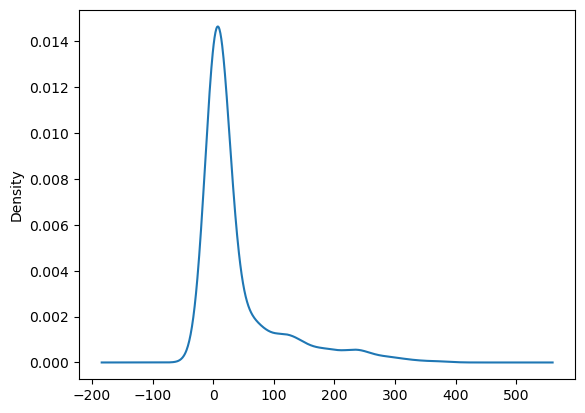

In [40]:
# Visualize the value counts of winner
winner_counts.plot.density()

In [50]:
# Determine which values to replace if counts are less than ...?
replace_winner = list(winner_name_counts[winner_name_counts < 100].index)

# Replace in dataframe
for app in replace_winner:
    match_stats_df.winner_name = match_stats_df.winner_name.replace(app,"Less Than 100 Wins")
    
# Check to make sure binning was successful
match_stats_df.winner_name.value_counts()

Less Than 100 Wins    6726
Yevgeny Kafelnikov     374
Andre Agassi           342
Tim Henman             322
Gustavo Kuerten        310
                      ... 
Sargis Sargsian        108
Juan Antonio Marin     104
Arnaud Di Pasquale     104
Max Mirnyi             102
Roger Federer          102
Name: winner_name, Length: 77, dtype: int64

In [46]:
# Look at bpSaved value counts for binning
bpSaved_value_counts = match_stats_df['bpSaved'].value_counts()
bpSaved_value_counts
# QUESTION ON BPSAVED??

2.0     2436
3.0     2412
4.0     2162
1.0     1987
5.0     1938
0.0     1766
6.0     1484
7.0     1179
8.0      800
9.0      641
10.0     454
11.0     311
12.0     222
13.0     139
14.0      91
15.0      71
16.0      43
17.0      34
18.0      19
20.0       9
19.0       7
21.0       5
24.0       4
25.0       4
22.0       2
Name: bpSaved, dtype: int64

<AxesSubplot:ylabel='Density'>

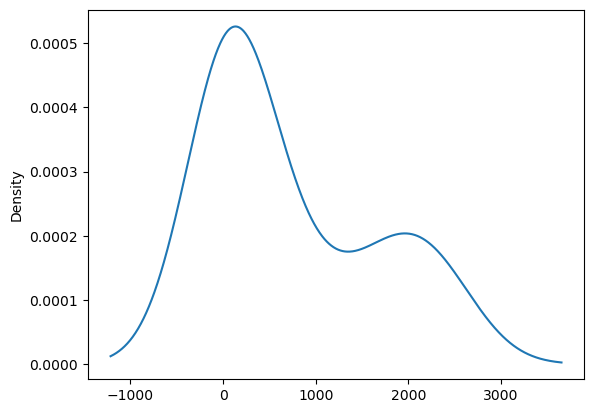

In [48]:
bpSaved_value_counts.plot.density()

In [49]:
# Determine which values to replace if counts are less than ..?
replace_bpSaved = list(bpSaved_value_counts[bpSaved_value_counts < 1000].index)

# Replace in dataframe
for cls in replace_bpSaved:
    match_stats_df.bpSaved = match_stats_df.bpSaved.replace(cls,"Under 1000")
    
# Check to make sure binning was successful
match_stats_df.bpSaved.value_counts()

Under 1000    2856
2.0           2436
3.0           2412
4.0           2162
1.0           1987
5.0           1938
0.0           1766
6.0           1484
7.0           1179
Name: bpSaved, dtype: int64

In [52]:
# Generate our categorical variable lists
match_stats_cat = match_stats_df.dtypes[match_stats_df.dtypes == "object"].index.tolist()
match_stats_cat

['surface', 'winner_name', 'loser_name', 'bpSaved']

In [53]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(match_stats_df[match_stats_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(match_stats_cat)
encode_df.head()

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [46]:
# Merge one-hot encoded features and drop the originals
match_stats_df = match_stats_df.merge(encode_df, left_index=True,right_index=True)
match_stats_df = match_stats_df.drop(columns = application_cat)
match_stats_df.head()

NameError: name 'encode_df' is not defined

In [47]:
# Split our preprocessed data into our features and target arrays
y = application_df['1stWon'].values
X = application_df.drop(['1stWon'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

NameError: name 'application_df' is not defined

In [48]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

NameError: name 'X_train' is not defined

In [49]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

NameError: name 'X_train' is not defined

In [50]:
# Compile the model
#  YOUR CODE GOES HERE
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

NameError: name 'nn' is not defined

In [51]:
# Train the model
fit_model = nn.fit(X_train, y_train,epochs=30)

NameError: name 'nn' is not defined

In [52]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

In [53]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

NameError: name 'nn' is not defined

In [54]:
# Export the model to HDF5 file
nn.save("Bouncing Yellow Neurons.h5")

NameError: name 'nn' is not defined